In [1]:

from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import os
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY']=os.getenv('LANGCHAIN_API_KEY')



In [4]:
from langchain_community.document_loaders import  WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [ ]:
urls=[
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/workflows-agents",
    "https://docs.langchain.com/oss/javascript/langgraph/add-memory"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs
# docs

[[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'description': 'Gain control with LangGraph to design agents that reliably handle complex tasks', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartLocal serverChangelogThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureTestLangSmith StudioAgent Chat UILangSmith DeploymentLangSmith ObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page installCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageGain control with LangGraph to desig

In [14]:
docs_list=[item for sublist in docs for item in sublist]
print(docs_list)

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
docs_splits = text_splitter.split_documents(docs_list)
print(docs_splits) 

# Add all these oto vectorstore
vectorstores=FAISS.from_documents(documents=docs_splits,embedding=OpenAIEmbeddings())
retriever=vectorstores.as_retriever()


[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'description': 'Gain control with LangGraph to design agents that reliably handle complex tasks', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KSupportGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartLocal serverChangelogThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureTestLangSmith StudioAgent Chat UILangSmith DeploymentLangSmith ObservabilityLangGraph APIsGraph APIFunctional APIRuntimeOn this page installCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageGain control with LangGraph to design

In [15]:
retriever.invoke("what is langgraph?")

[Document(id='f97f670e-0e06-4379-9108-ea236a3e3966', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'description': 'Gain control with LangGraph to design agents that reliably handle complex tasks', 'language': 'en'}, page_content='\u200bLangGraph ecosystem\nWhile LangGraph can be used standalone, it also integrates seamlessly with any LangChain product, giving developers a full suite of tools for building agents. To improve your LLM application development, pair LangGraph with:\nLangSmithTrace requests, evaluate outputs, and monitor deployments in one place. Prototype locally with LangGraph, then move to production with integrated observability and evaluation to build more reliable agent systems.Learn moreLangSmith Agent ServerDeploy and scale agents effortlessly with a purpose-built deployment platform for long running, stateful workflows. Discover, reuse, configure, and share agents across teams — and

In [22]:
### retrieve to Retriever Tools
from langchain_core .tools import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,"retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

In [23]:
retriever_tool

StructuredTool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x7f40be645f80>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x7f40be645e40>)

In [24]:
urls_langchain=[
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/workflows-agents",
    "https://docs.langchain.com/oss/javascript/langgraph/add-memory"
]

docs_langchain = [WebBaseLoader(url).load() for url in urls]

docs_list_langchain=[item for sublist in docs_langchain for item in sublist]

text_splitter_langchain = RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)
docs_splits_langchain = text_splitter.split_documents(docs_list_langchain)

# Add all these oto vectorstore
vectorstores_langchain=FAISS.from_documents(documents=docs_splits_langchain,embedding=OpenAIEmbeddings())
retriever_langchain=vectorstores_langchain.as_retriever()


In [25]:
### retrieve to Retriever Tools
from langchain_core .tools import create_retriever_tool
retriever_langchain=create_retriever_tool(
    retriever_langchain,"retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [26]:
tools=[retriever_tool,retriever_langchain]


## Langgraph Workflow

In [31]:
from typing import Annotated,Sequence,Literal
from typing_extensions import TypedDict
from pydantic import BaseModel,Field
from langchain_core.messages import HumanMessage,SystemMessage,BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    ## The add_messages function defines how an update should be processed
    # Default is to replce, add_messages says append
    messages=Annotated[Sequence[BaseMessage],add_messages]
    


In [29]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen/qwen3-32b")
response=llm.invoke("Hello")
response.content

'<think>\nOkay, the user said "Hello". That\'s pretty straightforward. I should respond in a friendly and welcoming manner. Maybe start with a greeting and offer help. Let me check if there\'s any specific context I need to consider. The user might be testing the waters or looking for assistance. I should keep it open-ended so they feel comfortable asking anything. Also, make sure the tone is positive and approachable. Alright, let\'s go with a simple but warm response.\n</think>\n\nHi there! How can I assist you today? 😊'

In [30]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. 
    Given the question , It will decide to retrieve using the retriever tool, or simply en.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages=state["messages"]
    model = ChatGroq(model="qwen/qwen3-32b")
    model=model.bind_tools(tools)
    response = model.invoke(messages)
    return {"messages":[response]}

In [ ]:
from langchain_core.prompts import PromptTemplate
## Edges
def grade_documents(state) -> Literal["generate","rewrite"]:
    """
    Determines wheather the retrieved documents are relevant to the question
    Args:
        state(messages): The current state
    Returns 
        str: A decision for wheather the documents are relevant or not
    """
    
    print("---CHECK RELEVANCE---")

    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score:str=Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="qwen/qwen3-32b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    #prompt
    prompt = PromptTemplate(
            template=""" You are a grader assessing relevance of a retrieved document to a user question.\n
            Here is the retrieved document: \n\n {context} \n\n
            Here is the question:  {question} \n
            If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant.\n
            Given a binary score 'yes' or 'no' score to indicate the document is relevant to the question.
            """,
            input_variables=["context","question"],
    )

    chain = prompt | llm_with_tool
    messages = state["messages"]
    last_message=messages[-1]

    question = messages[0].content
    docs=last_message.content

    scored_result = chain.invoke({"question":question,"context":docs})
    score = scored_result.binary_score
    if score == "yes":
        print("--- DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("--- DECISION: DOCS NOT RELEVANT---")
        return "rewrite"


In [34]:
from langchain_core.output_parsers import StrOutputParser
from langchain_classic import hub
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="qwen/qwen3-32b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}



In [35]:


def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="qwen/qwen3-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

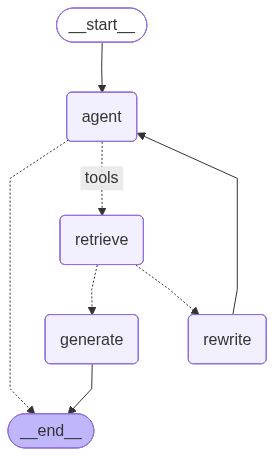

In [37]:
## Workflow with langgraph
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from langgraph.prebuilt import tools_condition,ToolNode
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver


# buil a graph
workflow=StateGraph(MessagesState)
workflow.add_node("agent",agent)
retrieve = ToolNode([retriever_tool,retriever_langchain])
workflow.add_node("retrieve",retrieve)
workflow.add_node("rewrite",rewrite)
workflow.add_node("generate",generate)

workflow.add_edge(START,"agent")

workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools":"retrieve",
        END:END,
    },  
    ) 
workflow.add_conditional_edges(
    "retrieve",
    grade_documents 
    ) 
workflow.add_edge("generate",END)
workflow.add_edge("rewrite","agent")
memory = MemorySaver()

# compile the graph
graph = workflow.compile()
#Visualize the graph 
graph_image=graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [42]:
graph.invoke({"messages":"What is  langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
--- DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is  langgraph?', additional_kwargs={}, response_metadata={}, id='489da19c-efe6-4250-8ce6-ccc2ff54d2b9'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is langgraph?" I need to figure out which tool to use here. Let me check the available functions. There\'s one called retriever_vector_db_blog which is for searching information about Langgraph, and another for Langchain. Since the question is about Langgraph, I should use the first function. The parameters require a query string. The user\'s query is straightforward, so I\'ll use "langgraph" as the query term. I need to make sure the JSON is correctly formatted with the function name and arguments. Let me structure the tool call accordingly.\n', 'tool_calls': [{'id': 's7zg4085s', 'function': {'arguments': '{"query":"langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15

In [43]:
graph.invoke({"messages":"What is rust machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is rust machine learning?', additional_kwargs={}, response_metadata={}, id='814903b4-64ed-46d6-8856-5fe0ff4665a3'),
  AIMessage(content='The concept of "Rust machine learning" refers to using the Rust programming language for developing machine learning (ML) models or working with ML libraries in Rust. Rust is known for its performance, memory safety, and concurrency features, making it an attractive choice for systems-level ML tasks. However, it is less commonly used than Python for ML workflows.\n\n### Key Points:\n1. **Libraries in Rust for ML**:\n   - **`tch-rs`**: A Rust binding for PyTorch (via the LibTorch C++ API), enabling ML model development in Rust.\n   - **`ndarray`**: A numerical array library for linear algebra operations.\n   - **`linfa`**: A Rust ML library inspired by scikit-learn, offering basic ML algorithms (e.g., regression, clustering).\n   - **`autodiff`**: Automatic differentiation for building neural networks.\n\n2. **U